In [1]:
import sys

# Move to scripts directory
sys.path.append('../utils')

from create_cross_sec import create_cross_sec

In [21]:
import numpy as np
import pickle


f = open(f"/Users/akotamraju/Documents/dev/URAP/main-responseapprox/data/cross-sec-data/FlatContinuumIsotropic.inc520.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

y_arr = np.array(vals['y'])
print(y_arr.shape)

f.close()

(36, 196608)


In [22]:
print(y_arr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
NSIDE = 16
NUMPIX = 12 * NSIDE ** 2
COMPTON_RESOLUTION_DEG = 5

# split_data = create_cross_sec(arr, NSIDE, NUMPIX, COMPTON_RESOLUTION_DEG)

In [26]:

import healpy as hp

sys.path.append("../utils")
from utils import normalize, scale

def denoise(arr, THRESHOLD):
    new_arr = []
    for i in range(len(arr) - 1):
        if arr[i - 1] < THRESHOLD and arr[i + 1] < THRESHOLD: 
            new_arr.append(0)
        else:
            new_arr.append(arr[i])
    
    # Add last element
    new_arr.append(arr[-1])

    return np.asarray(new_arr)



def find_neighbors_above_threshold(map_array, threshold):
    # Create a new array to store the filtered values
    filtered_array = np.zeros_like(map_array)

    # Get the HEALPix NSIDE and the pixel indices
    nside = hp.get_nside(map_array)
    indices = np.arange(hp.nside2npix(nside))

    # Loop through all pixel indices
    for idx in indices:
        # Get the pixel's theta and phi coordinates
        theta, phi = hp.pix2ang(nside, idx)

        # Get the neighbors of the current pixel
        neighbors = hp.get_all_neighbours(nside, theta, phi)

        # Check if any neighbor has a value greater than the threshold
        if any(map_array[neighbors] > threshold):
            filtered_array[idx] = map_array[idx]

    return filtered_array
    

for i in range(36):
    test_data_y = y_arr[i]

    # Normalize each cross section
    range_val = np.max(test_data_y) - np.min(test_data_y)

    cross_sec = test_data_y
   

    # minval = np.min(cross_sec[np.nonzero(cross_sec)])
    # maxval = np.max(cross_sec[np.nonzero(cross_sec)])

    # print(minval, maxval)

    hp.cartview(cross_sec)

IndentationError: expected an indented block (2720391936.py, line 31)

In [305]:

import torch

y_after = torch.tensor(cross_sec).to(dtype=torch.float32, device="cpu")
y_after = y_after.detach().numpy()

minval = np.min(cross_sec[np.nonzero(cross_sec)])
maxval = np.max(cross_sec[np.nonzero(cross_sec)])

print(minval, maxval)

print("DTYPE: ", y_after.dtype)

hp.mollview(y_after)

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
NSIDE = 1024
NUMPIX = 12 * NSIDE ** 2
COMPTON_RESOLUTION_DEG = 8


f = open(f"/Users/akotamraju/Documents/dev/URAP/new-responseapprox/data/full-sim-data/FlatContinuumIsotropic.inc515.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

split_data = create_cross_sec(vals, NSIDE, NUMPIX, COMPTON_RESOLUTION_DEG)

---> 0 values loaded
---> 100000 values loaded
---> 200000 values loaded
---> 300000 values loaded
---> 400000 values loaded
---> 500000 values loaded


KeyboardInterrupt: 

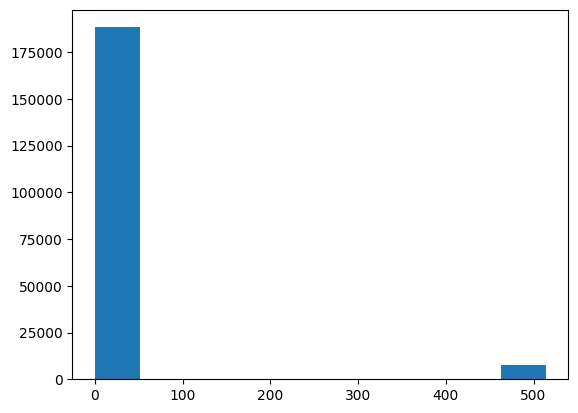

In [14]:
import matplotlib.pyplot as plt
plt.hist(y_arr[5])
plt.show()

(array([1.88281e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.14000e+02, 2.37000e+02, 9.20000e+01, 2.00000e+00, 7.88200e+03]),
 array([-0.20958358,  0.30149795,  0.81257947,  1.323661  ,  1.83474253,
         2.34582406,  2.85690558,  3.36798711,  3.87906864,  4.39015017,
         4.9012317 ]),
 <BarContainer object of 10 artists>)

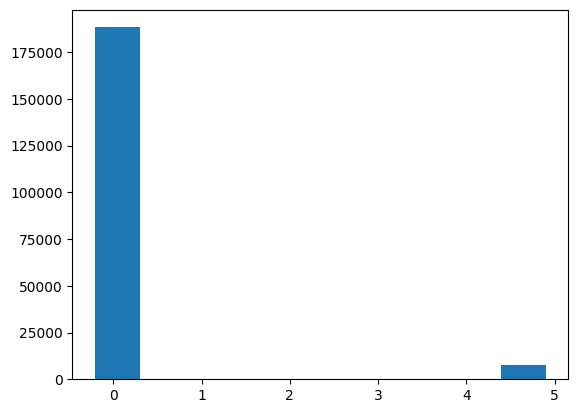

In [15]:
plt.hist(normalize(scale(y_arr[5])))

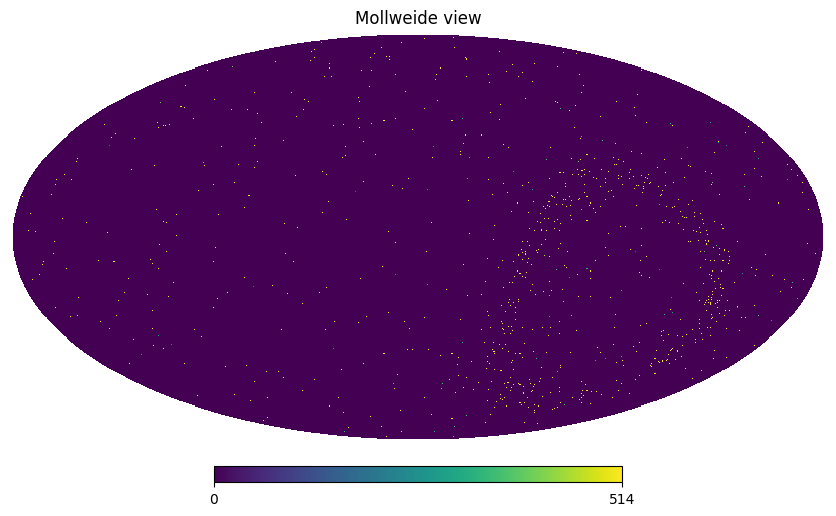

In [ ]:
new_test_data = split_data['y'][5]
hp.mollview(new_test_data)

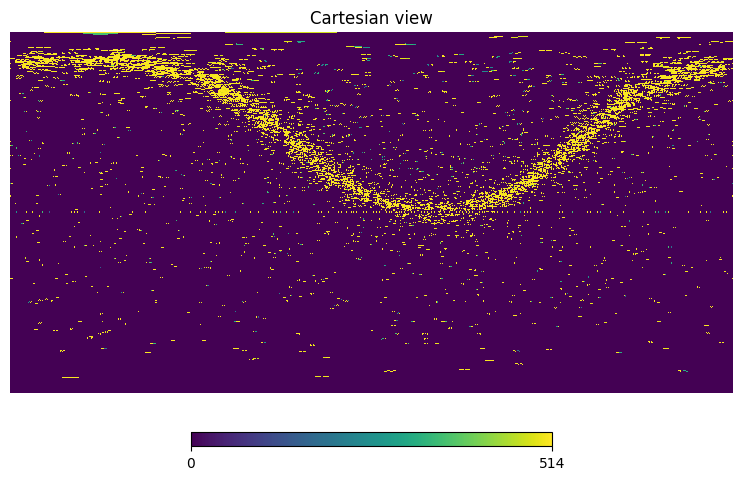

In [312]:
cartmap = hp.cartview(y_arr[10], return_projected_map=True)

In [ ]:
import cv2
reshaped = cv2.resize(cartmap, (384, 512))

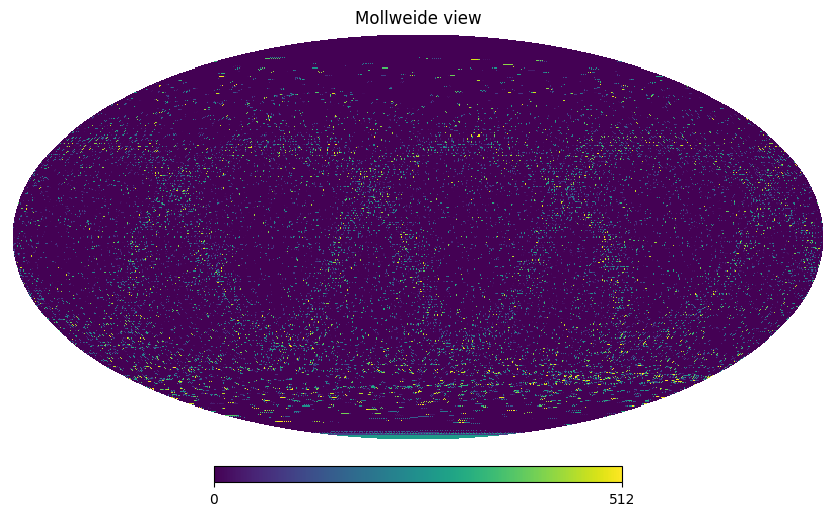

In [136]:
hp.mollview(reshaped.flatten())

In [145]:
import healpy as hp
import numpy as np

def arrange_healpix_pixels(nside, pixel_list):
    total_pixels = hp.nside2npix(nside)
    arranged_pixels = np.full(total_pixels, hp.UNSEEN)

    for pixel in pixel_list:
        arranged_pixels[pixel] = pixel

    return arranged_pixels

my_nside = 128
arranged_pixels = arrange_healpix_pixels(my_nside, y_arr[20])


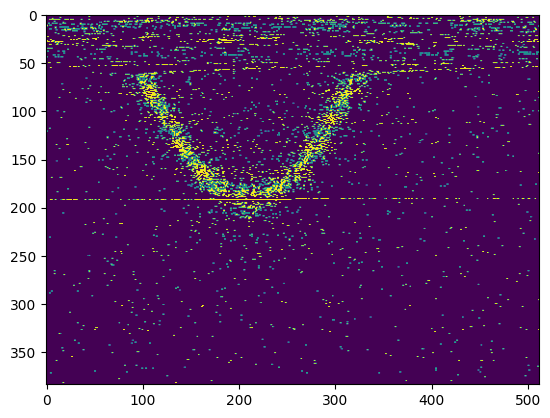

In [314]:
import matplotlib.pyplot as plt

plt.imshow(y_arr[10].reshape(384, 512))

(array([2.96000e+02, 1.20300e+03, 3.04700e+03, 6.34100e+03, 1.08320e+04,
        1.74100e+04, 1.58080e+04, 3.49600e+03, 4.96000e+02, 5.38557e+05]),
 array([ 74.4506 , 118.58249, 162.71438, 206.84627, 250.97816, 295.11005,
        339.24194, 383.37383, 427.50572, 471.63761, 515.7695 ]),
 <BarContainer object of 10 artists>)

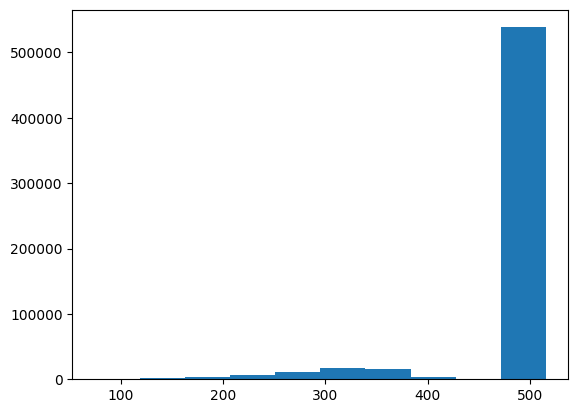

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


f = open(f"/Users/akotamraju/Documents/dev/URAP/new-responseapprox/data/full-sim-data/FlatContinuumIsotropic.inc965.id1.tra.gz.pkl", "rb");

vals = pickle.load(f)

f.close()

plt.hist(vals[2])



(array([ 18757.,  62244.,  93456., 105526., 100705.,  96599.,  53445.,
         36117.,  23052.,   7585.]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.]),
 <BarContainer object of 10 artists>)

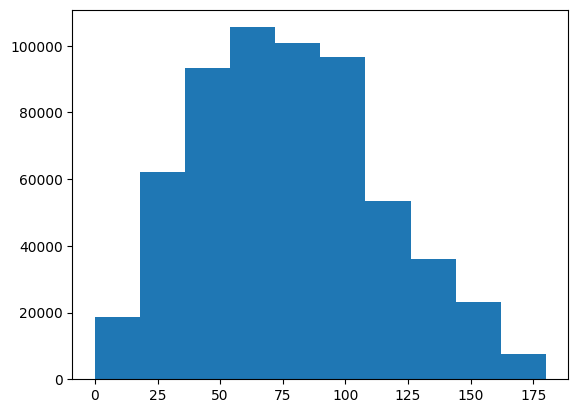

In [ ]:
plt.hist(vals[3])

In [ ]:
max(vals[4])

179.96627676698233